In [1]:
import os
from os import listdir
from os.path import join, dirname
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

PATH_REPO = dirname(os.getcwd())
PATH_DATA = join(PATH_REPO, 'data')
PATH_UTILS = join(PATH_REPO, 'src')
sys.path.append(PATH_UTILS)

import preprocess


In [2]:
train = pd.read_csv(join(PATH_DATA, 'Train.csv'))
submission_df = pd.read_csv(join(PATH_DATA, 'SampleSubmission.csv'))
submission_df[['year', 'month', 'site_code', 'product_code']] = submission_df['ID'].str.split(' X ', expand=True)
product_data = pd.read_csv(join(PATH_DATA, 'product.csv'))
prodCode2prodType = {code:type for type, code in zip(product_data.loc[:,'product_type'].values, 
                                                product_data.loc[:,'product_code'].values)}


In [3]:
service_data = pd.read_csv(join(PATH_DATA, 'service_delivery_site_data.csv'))
servCode2servType = {code:type for code, type in zip(service_data.loc[:,'site_code'].values, 
                                                service_data.loc[:,'site_type'].values)}
train['service_type'] = train['site_code'].apply(lambda x: servCode2servType[x])

In [4]:
train['year_month'] = train['year'].astype(str) + '-' + train['month'].astype(str)
train['year_month'] = pd.to_datetime(train['year_month']).dt.strftime('%Y-%m')

## Describe variables

In [5]:
train.isna().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
service_type                     0
year_month                       0
dtype: int64

### Amount of each product distributed

In [6]:
for product in np.unique(train.loc[:,'product_code']):
    data_product = train.loc[train.loc[:,'product_code']==product, 'stock_distributed'].sum()
    print(f'the total stock distributed for product code {product} and type {prodCode2prodType[product]} is {data_product}')

the total stock distributed for product code AS17005 and type Female Condom is 2104
the total stock distributed for product code AS21126 and type Injectable Contraceptive is 398
the total stock distributed for product code AS27000 and type Oral Contraceptive (Pill) is 158906
the total stock distributed for product code AS27132 and type Oral Contraceptive (Pill) is 23975
the total stock distributed for product code AS27133 and type Injectable Contraceptive is 146777
the total stock distributed for product code AS27134 and type Injectable Contraceptive is 97780
the total stock distributed for product code AS27137 and type Contraceptive Implant is 29787
the total stock distributed for product code AS27138 and type Contraceptive Implant is 26950
the total stock distributed for product code AS27139 and type Emergency Contraceptive (Pill) is 2234
the total stock distributed for product code AS42018 and type Intrauterine Device (IUD) is 560
the total stock distributed for product code AS46000

- The products most consumed are the contraceptive pill and the injectable contraceptive. For the contraceptive pill there are 2 product codes and we see that one is 7x more consumed than the other.
- The injectable contraceptives are the most consumed. There are 3 types one is very rarely consumed. The two others are very consumed
- The female condom, emergency contraceptive and IUD are rarely consumed.

## Missing values

## Stock distributed per region

In [7]:
for region in np.unique(train.loc[:,'region']):
    sum = train.loc[train.loc[:,'region']==region, 'stock_distributed'].sum()
    print(f'the total stock distributed for region {region} is {sum}')

the total stock distributed for region ABIDJAN 1-GRANDS PONTS is 100827
the total stock distributed for region ABIDJAN 2 is 96064
the total stock distributed for region AGNEBY-TIASSA-ME is 30708
the total stock distributed for region BELIER is 21662
the total stock distributed for region BOUNKANI-GONTOUGO is 10105
the total stock distributed for region CAVALLY-GUEMON is 20448
the total stock distributed for region GBEKE is 7690
the total stock distributed for region GBOKLE-NAWA-SAN PEDRO is 32774
the total stock distributed for region GOH is 25898
the total stock distributed for region HAMBOL is 10772
the total stock distributed for region HAUT-SASSANDRA is 17842
the total stock distributed for region INDENIE-DJUABLIN is 6865
the total stock distributed for region KABADOUGOU-BAFING-FOLON is 6151
the total stock distributed for region LOH-DJIBOUA is 20033
the total stock distributed for region MARAHOUE is 19589
the total stock distributed for region N'ZI-IFOU-MORONOU is 19239
the total 

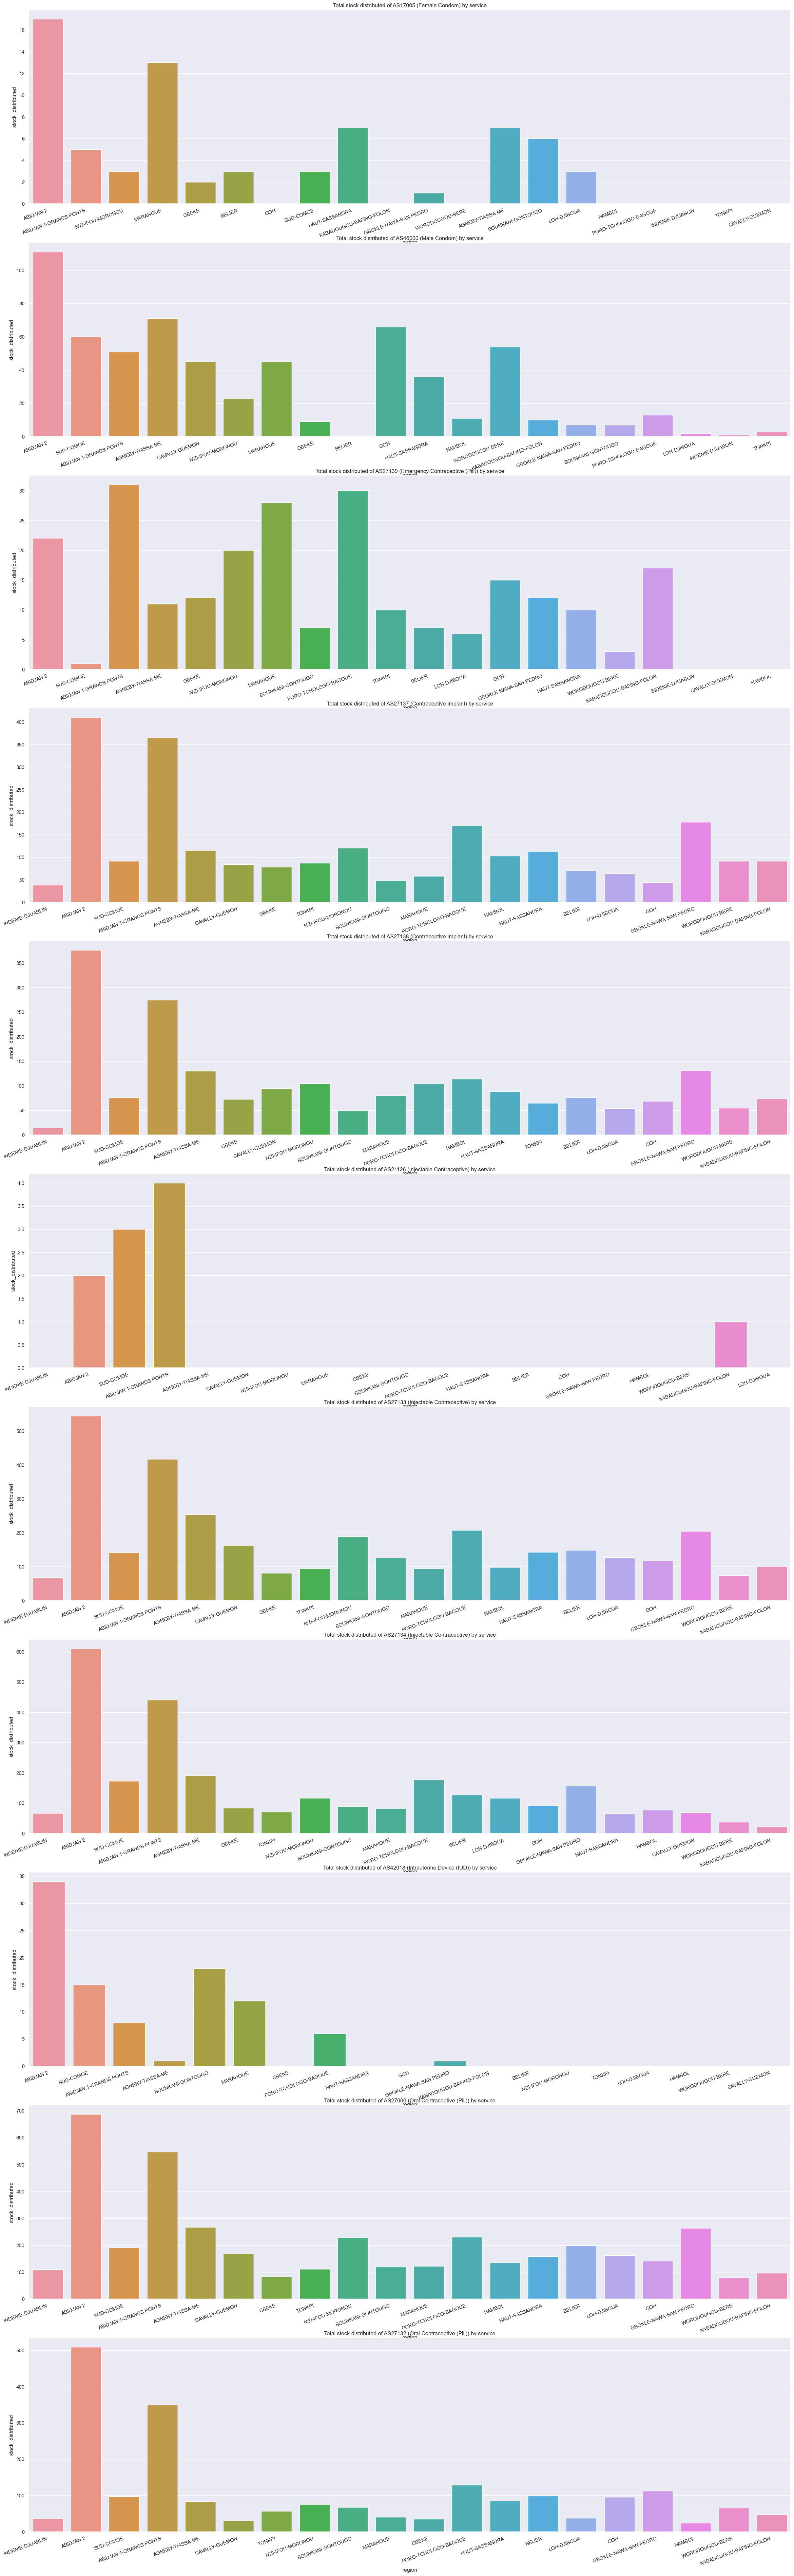

In [8]:
from numpy import count_nonzero
sns.set()

fig, ax = plt.subplots(nrows=len(prodCode2prodType), ncols=1, figsize=(30, 100))

for k, (prod_code, prod_type) in enumerate(prodCode2prodType.items()):
    data_product = train.loc[train.loc[:,'product_code']==prod_code,]
    sns.barplot(x = 'region', y='stock_distributed',  data = data_product, estimator=count_nonzero,ax=ax[k], errorbar=None)
    ax[k].set_xticklabels(ax[k].get_xticklabels(), rotation=20, ha="right")
    ax[k].set_title(f'Total stock distributed of {prod_code} ({prod_type}) by service')

## Stock distributed by type of service

In [9]:
for service in np.unique(train.loc[:,'service_type']):
    sum = train.loc[train.loc[:,'service_type']==service, 'stock_distributed'].sum()
    print(f'the total stock distributed for service {service} is {sum}')
    print(f'In total there are {train.loc[train.loc[:,"service_type"]==service,].shape[0]} {service}')
    print(f'ratio is {sum/train.loc[train.loc[:,"service_type"]==service,].shape[0]} per {service}')
    print('\n')



the total stock distributed for service Health Center is 149593
In total there are 10332 Health Center
ratio is 14.478610143244289 per Health Center


the total stock distributed for service Hospital is 367502
In total there are 24779 Hospital
ratio is 14.831187699261472 per Hospital


the total stock distributed for service University Hospital/National Institute is 10774
In total there are 642 University Hospital/National Institute
ratio is 16.781931464174455 per University Hospital/National Institute




In 3 years the distribution in average is of 15 contraceptives per service site!!

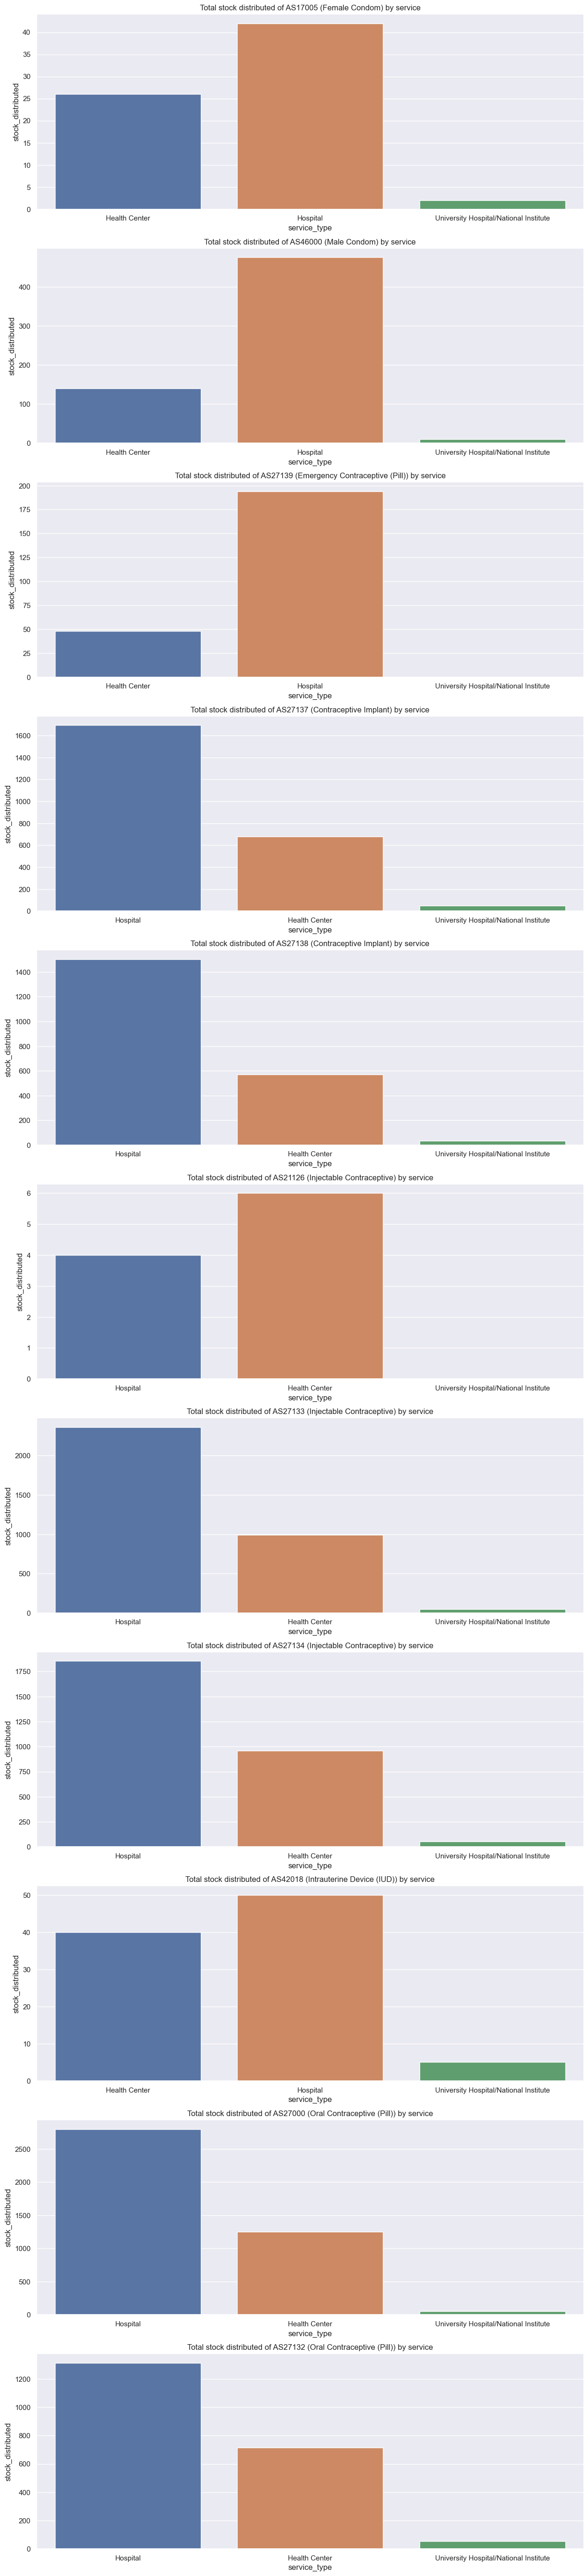

In [10]:
from numpy import count_nonzero
sns.set()
fig, ax = plt.subplots(nrows=len(prodCode2prodType), ncols=1, figsize=(15, 70))

for k, (prod_code, prod_type) in enumerate(prodCode2prodType.items()):
    data_product = train.loc[train.loc[:,'product_code']==prod_code,]
    sns.barplot(x = 'service_type', y='stock_distributed',  data = data_product, estimator=count_nonzero,ax=ax[k], errorbar=None)
    ax[k].set_title(f'Total stock distributed of {prod_code} ({prod_type}) by service')
#plt.show()

## Plot variable for product

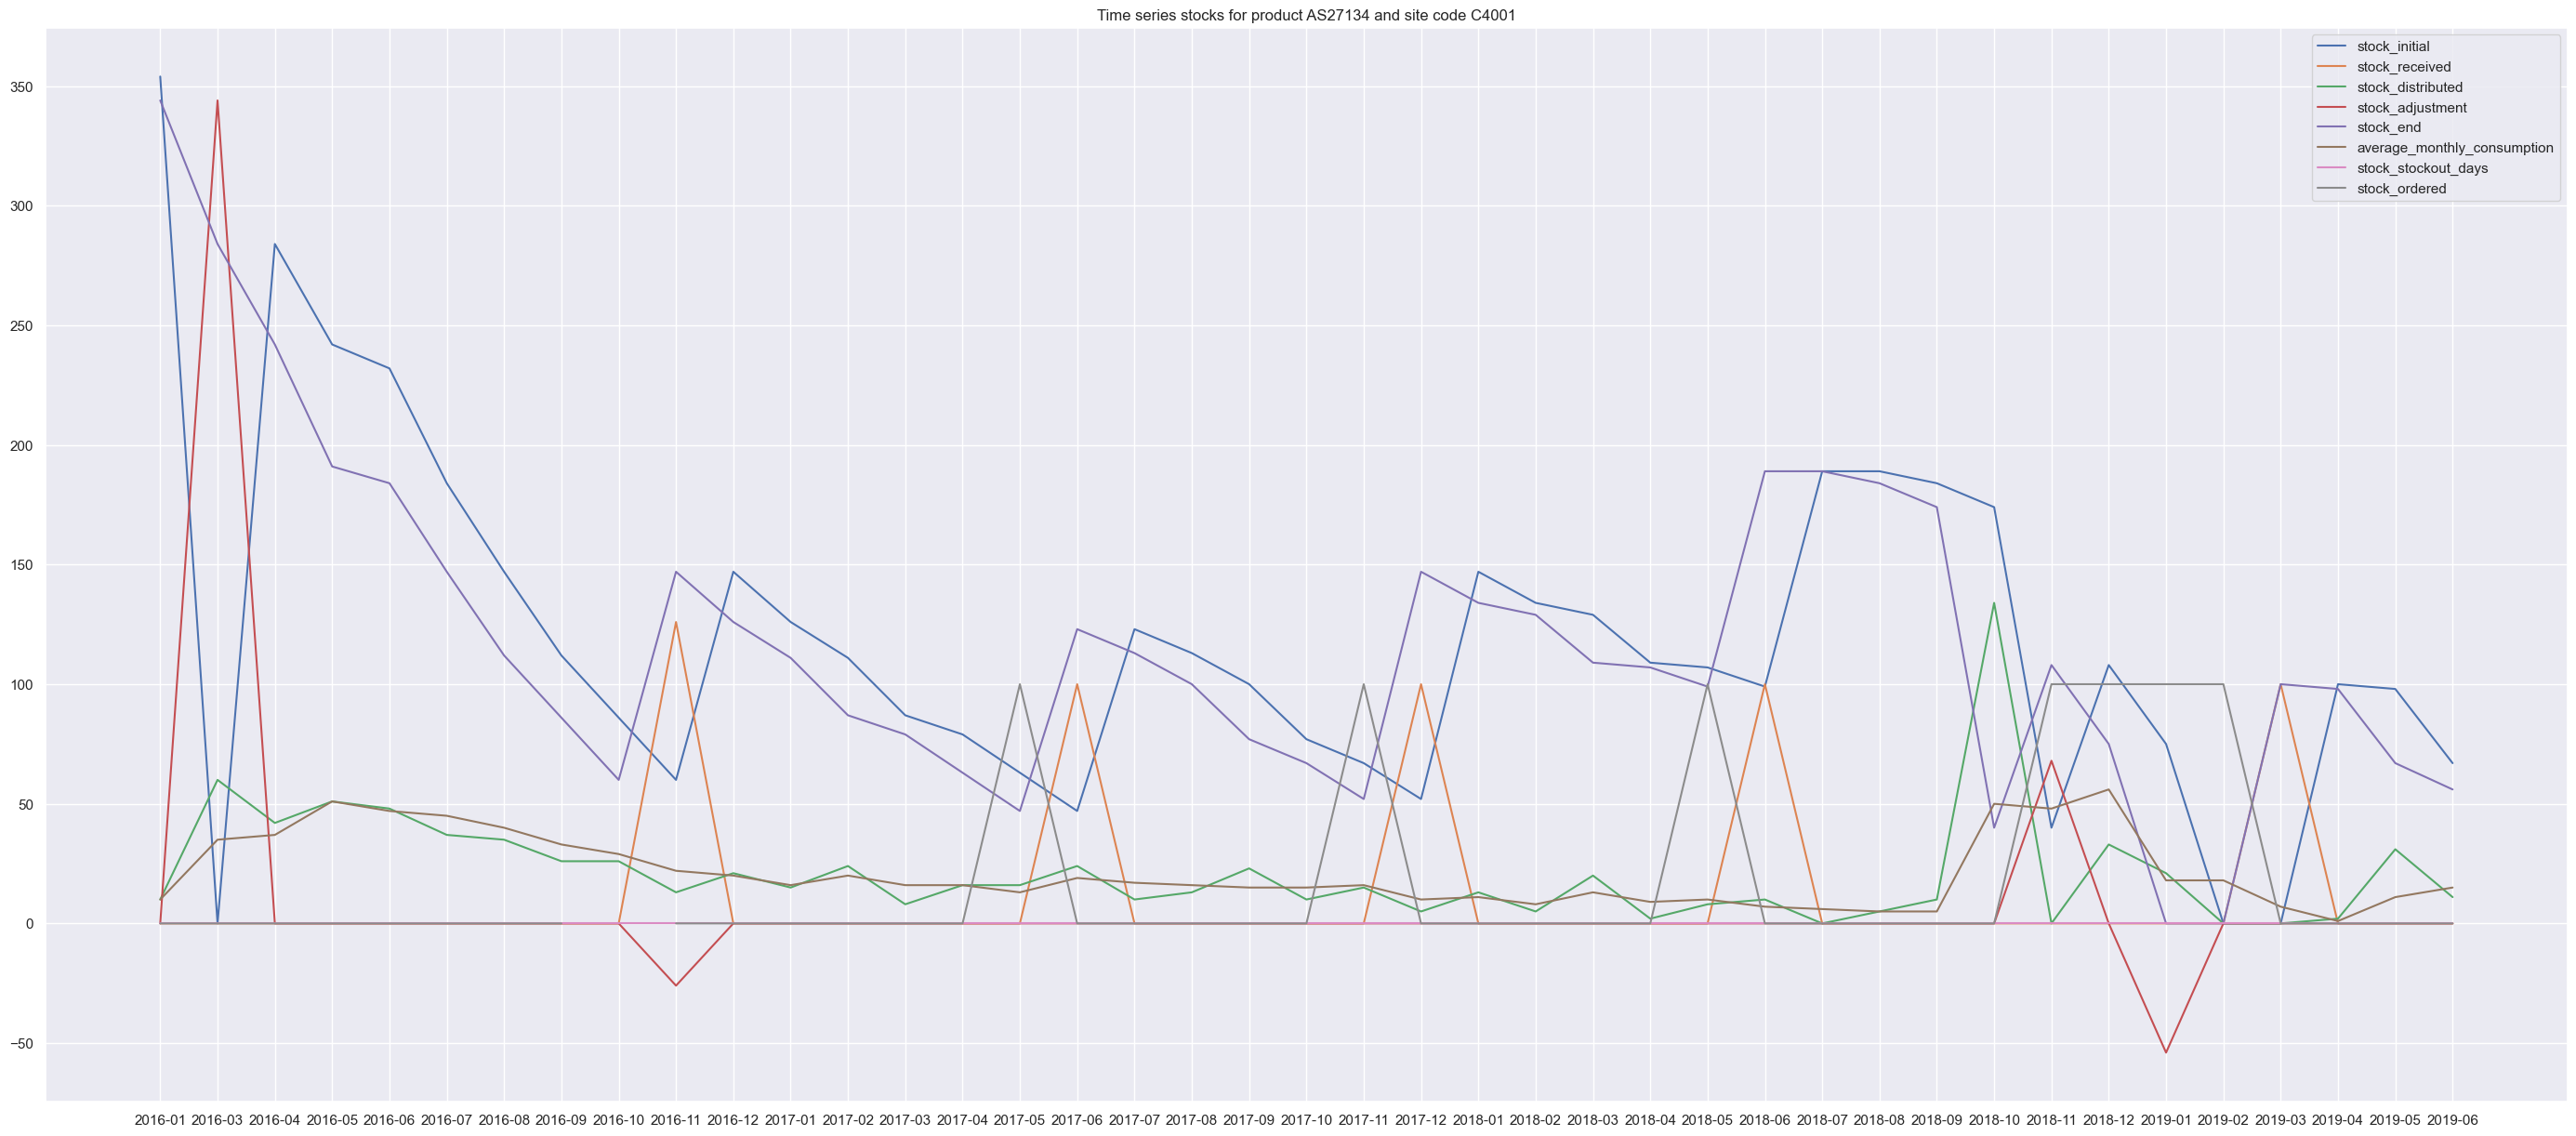

In [11]:
sns.set()
plt.rcParams["figure.figsize"] = (35,15)

data_product_site = train.loc[(train.loc[:,'site_code']=='C4001') & (train.loc[:,'product_code']=='AS27134') ,]
data_product_site.index = data_product_site['year_month']
sorted_idx = data_product_site.index.sort_values()
data_product_site = data_product_site.loc[sorted_idx,]

for col in data_product_site.columns[6:-2]:
    plt.plot(data_product_site.index, data_product_site[col], label=col)
plt.title('Time series stocks for product AS27134 and site code C4001')
plt.legend()


## Let's study for all the products on a service site

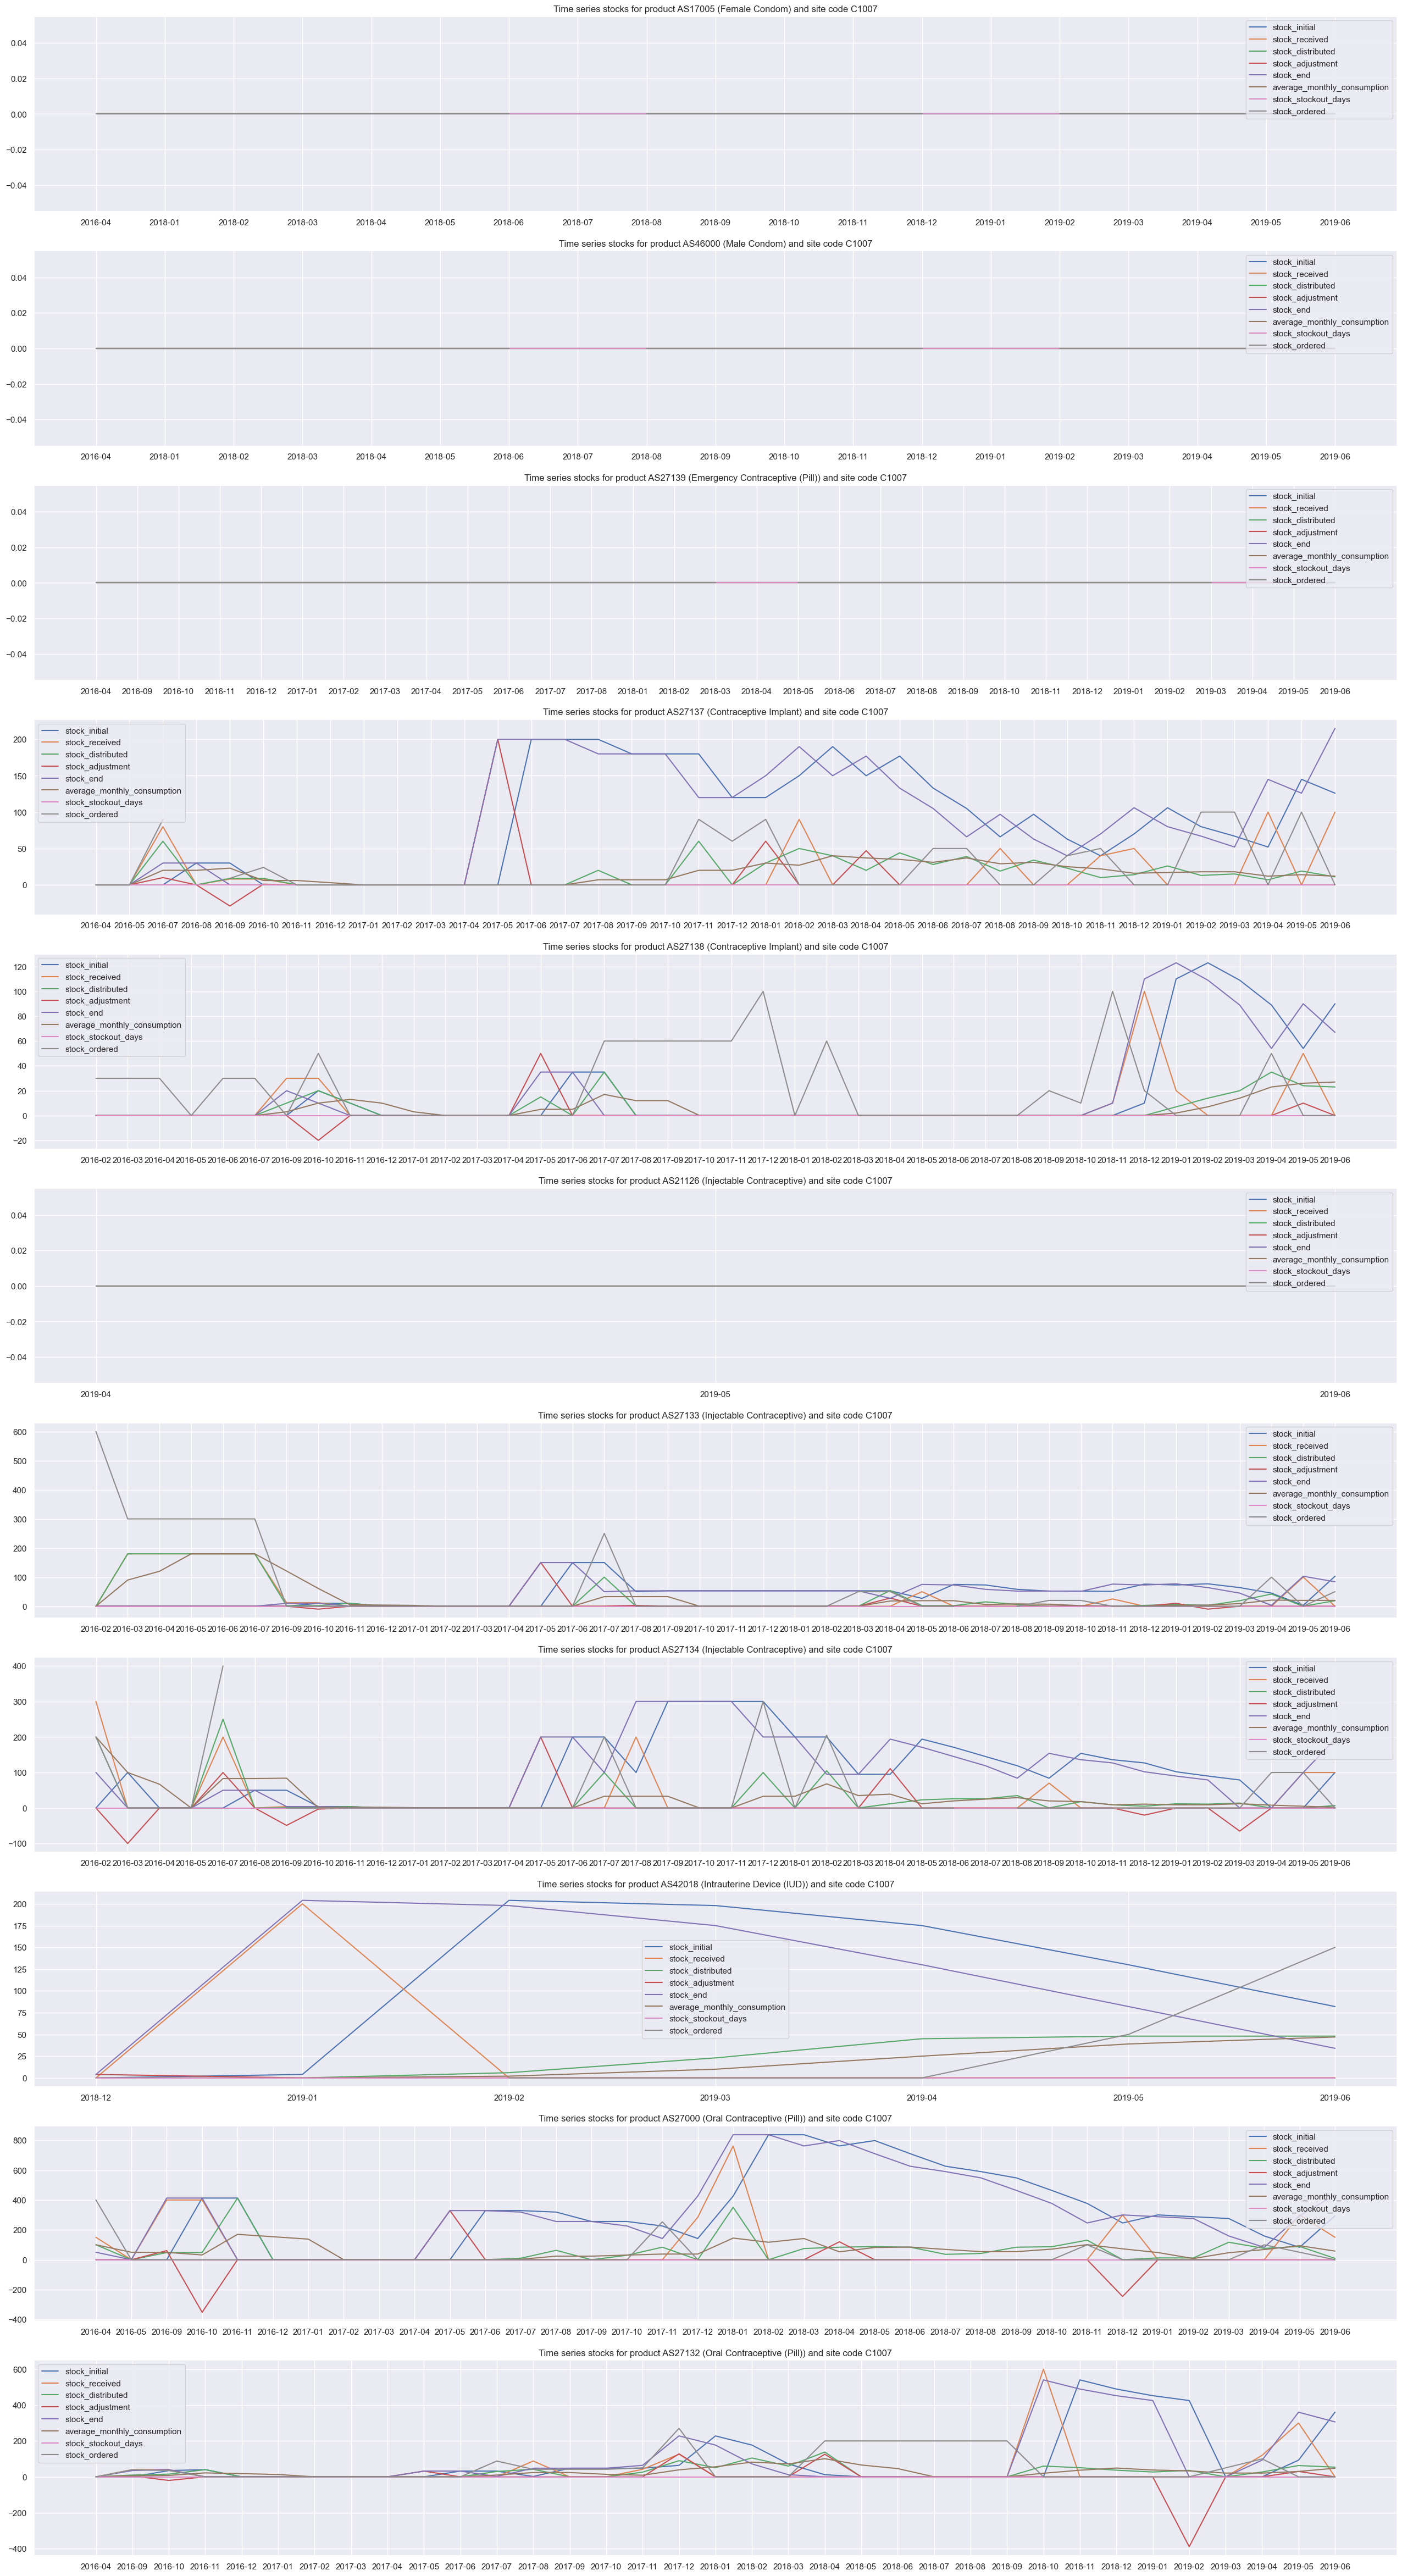

In [12]:
SERVICE_SITE = 'C1007'

fig, ax = plt.subplots(nrows=len(prodCode2prodType), ncols=1, figsize=(32, 60))

for k,prod_code in enumerate(prodCode2prodType.keys()):
    data_product_site = train.loc[(train.loc[:,'site_code']==SERVICE_SITE) & (train.loc[:,'product_code']==prod_code) ,]
    data_product_site.index = data_product_site['year_month']
    sorted_idx = data_product_site.index.sort_values()
    data_product_site = data_product_site.loc[sorted_idx,]

    for col in data_product_site.columns[6:-2]:
        ax[k].plot(data_product_site.index, data_product_site[col], label=col)
        #ax[k].set_xticklabels(ax[k].get_xticklabels(), rotation=10, ha="right")

    ax[k].set_title(f'Time series stocks for product {prod_code} ({prodCode2prodType[prod_code]}) and site code {SERVICE_SITE}')
    ax[k].legend()


### Study products with rare consumptions


In [13]:
products_rare_consumed = {'AS17005': 'Female Condom', 'AS27139': 'Emergency Contraceptive (Pill)', 
                            'AS42018': 'Intrauterine Device (IUD)', 'AS21126': 'Injectable Contraceptive'}

for prod_code, prod_type in products_rare_consumed.items():
    print('-----')
    print(f'The product {prod_code} ({prod_type}): ')
    data_product = train.loc[(train.loc[:,'product_code']==prod_code) &  (train.loc[:,'stock_distributed']>0),]
    codes_site = np.unique(data_product.loc[:,'site_code'])
    for site in codes_site:
        print(f' - For site {site} the stock distributed is: \
            {data_product.loc[data_product.loc[:,"site_code"]==site,"stock_distributed"].sum()}')
    print('-----')



-----
The product AS17005 (Female Condom): 
 - For site C1014 the stock distributed is:             1
 - For site C1015 the stock distributed is:             19
 - For site C1018 the stock distributed is:             7
 - For site C1024 the stock distributed is:             18
 - For site C1077 the stock distributed is:             9
 - For site C1084 the stock distributed is:             27
 - For site C1087 the stock distributed is:             19
 - For site C1098 the stock distributed is:             15
 - For site C1681 the stock distributed is:             11
 - For site C2003 the stock distributed is:             6
 - For site C2009 the stock distributed is:             100
 - For site C2010 the stock distributed is:             18
 - For site C2011 the stock distributed is:             97
 - For site C2051 the stock distributed is:             5
 - For site C2055 the stock distributed is:             48
 - For site C2056 the stock distributed is:             5
 - For site C2064

### Format Data

In [14]:
train_format = preprocess.format_data(train)

In [53]:
product_codes = np.unique(train_format.product_code)
site_codes = np.unique(train_format.site_code)
dates = np.unique(train_format.date)

k=0
for product in product_codes:
    if k>20:
        break
    for site in site_codes:
        missing_vals = preprocess.missing_stock_distributed_ts(train_format, product, site)
        #if (missing_vals>=len(dates)//2) & (missing_vals<=len(dates)/1.3):
        if missing_vals==3:
            print(f'product: {product} and site: {site} have {missing_vals} missing values')
            k+=1
        


product: AS17005 and site: C1027 have 3 missing values
product: AS17005 and site: C1030 have 3 missing values
product: AS17005 and site: C1681 have 3 missing values
product: AS17005 and site: C2008 have 3 missing values
product: AS27000 and site: C1054 have 3 missing values
product: AS27000 and site: C1095 have 3 missing values
product: AS27000 and site: C1681 have 3 missing values
product: AS27000 and site: C3012 have 3 missing values
product: AS27000 and site: C3023 have 3 missing values
product: AS27000 and site: C4017 have 3 missing values
product: AS27000 and site: C5004 have 3 missing values
product: AS27000 and site: C5006 have 3 missing values
product: AS27000 and site: C5018 have 3 missing values
product: AS27000 and site: C5020 have 3 missing values
product: AS27132 and site: C1054 have 3 missing values
product: AS27132 and site: C1056 have 3 missing values
product: AS27132 and site: C2059 have 3 missing values
product: AS27132 and site: C2068 have 3 missing values
product: A

In [34]:
data_product_site.columns[7:-2]

Index(['stock_initial', 'stock_received', 'stock_distributed',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_stockout_days', 'stock_ordered'],
      dtype='object')

### Filling missing values 

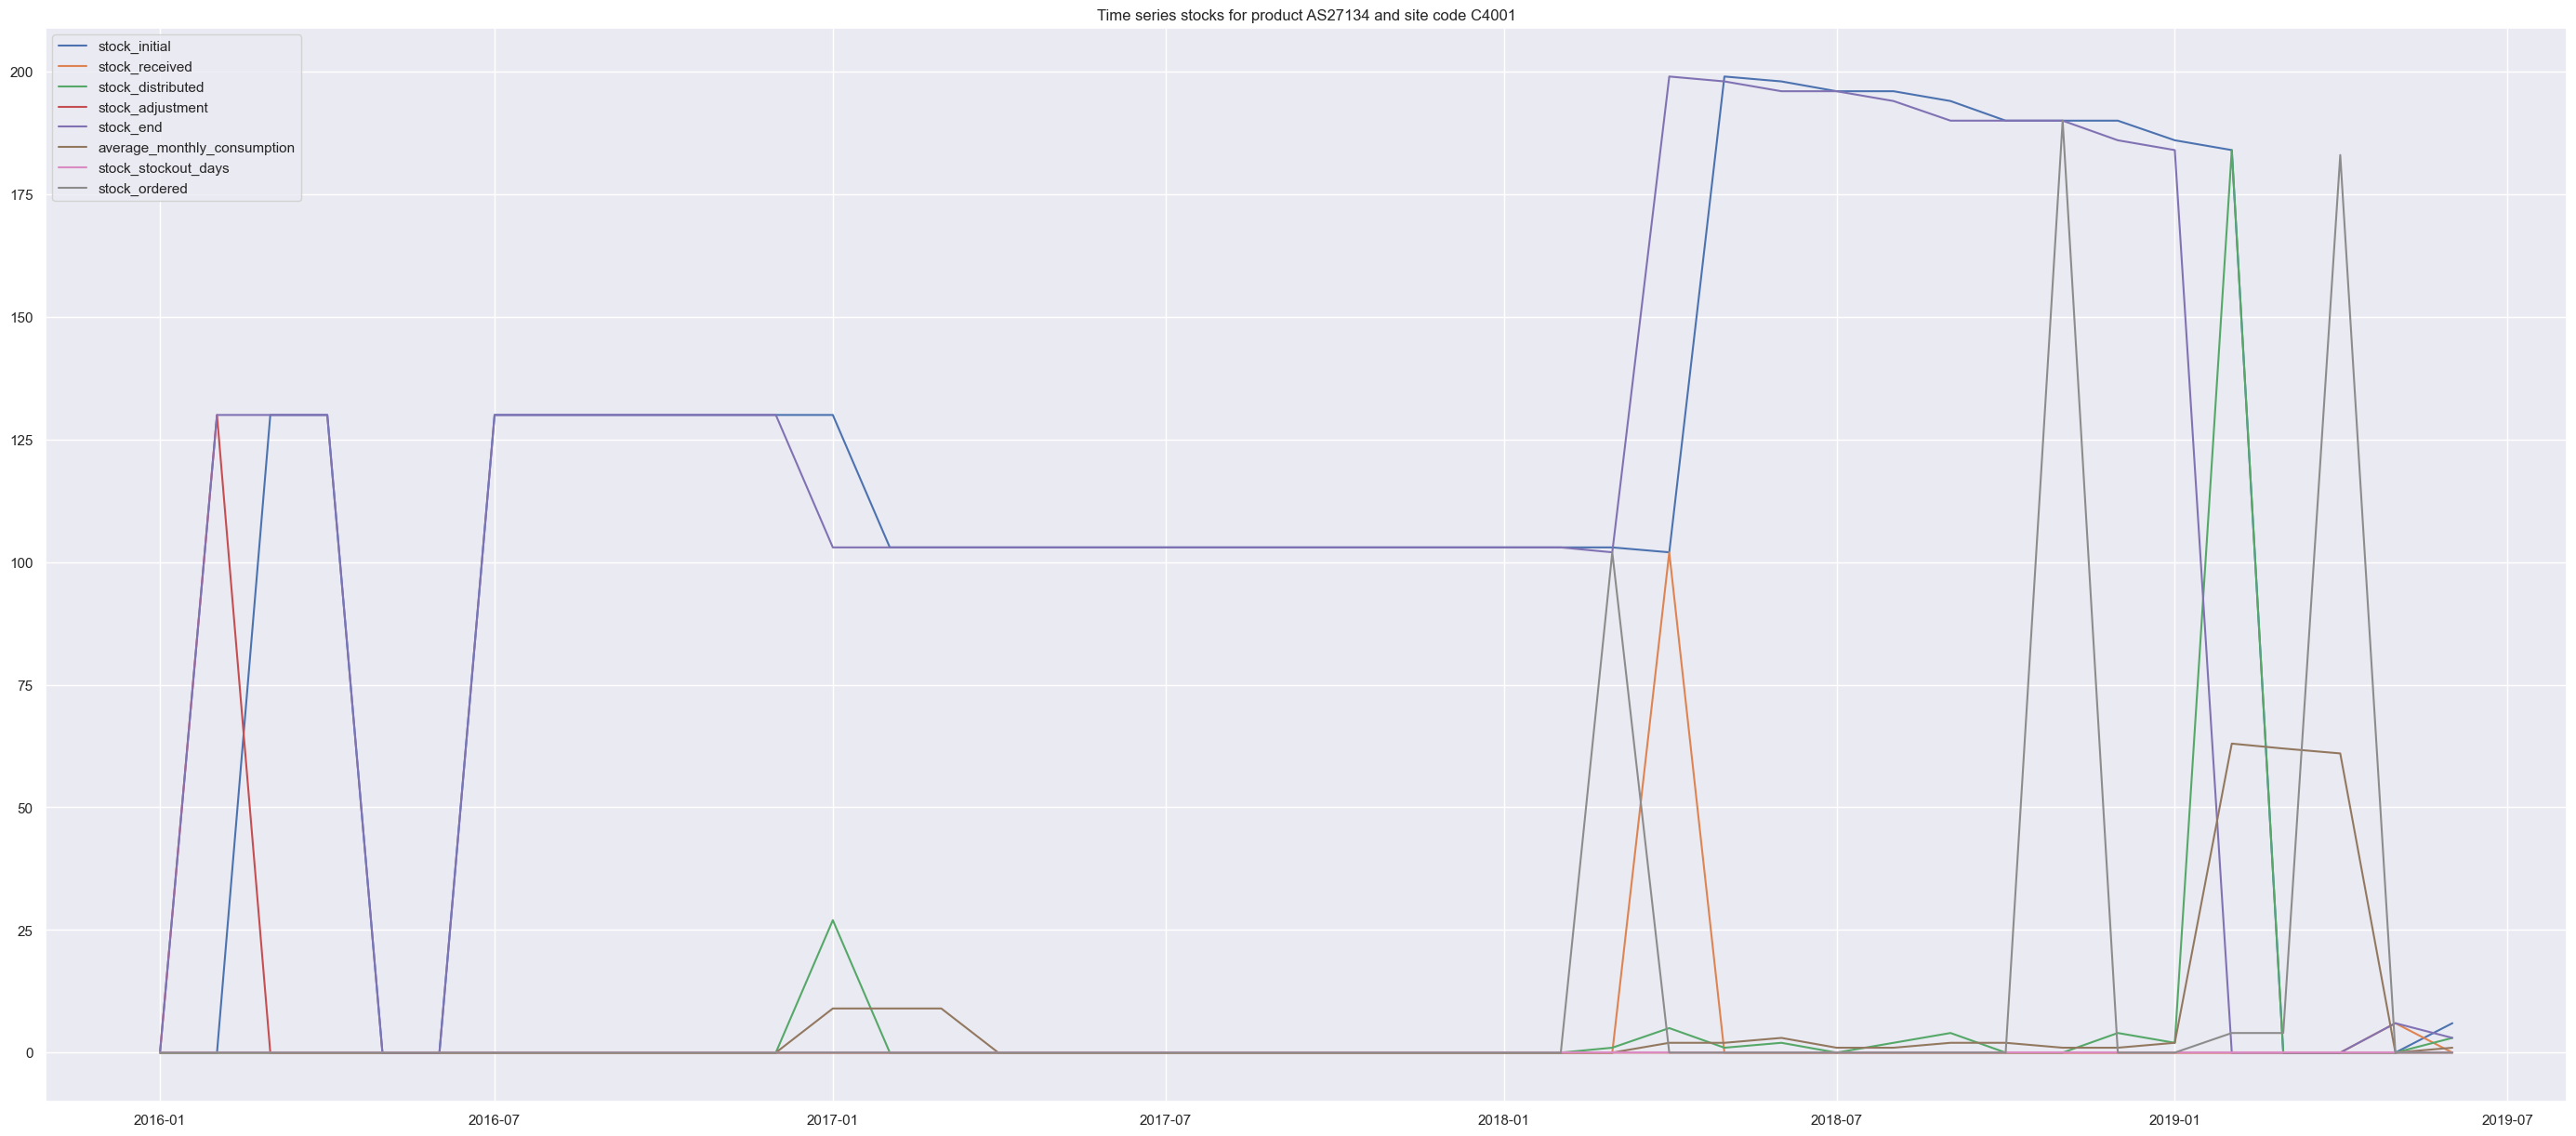

In [56]:
sns.set()
plt.rcParams["figure.figsize"] = (35,15)

data_product_site = train_format.loc[(train_format.loc[:,'site_code']=='C5004') & (train_format.loc[:,'product_code']=='AS27132') ,].fillna(0)
data_product_site.index = data_product_site['date']
sorted_idx = data_product_site.index.sort_values()
data_product_site = data_product_site.loc[sorted_idx,]

for col in data_product_site.columns[7:-2]:
    plt.plot(data_product_site.index, data_product_site[col], label=col)
plt.title('Time series stocks for product AS27134 and site code C4001')
plt.legend()

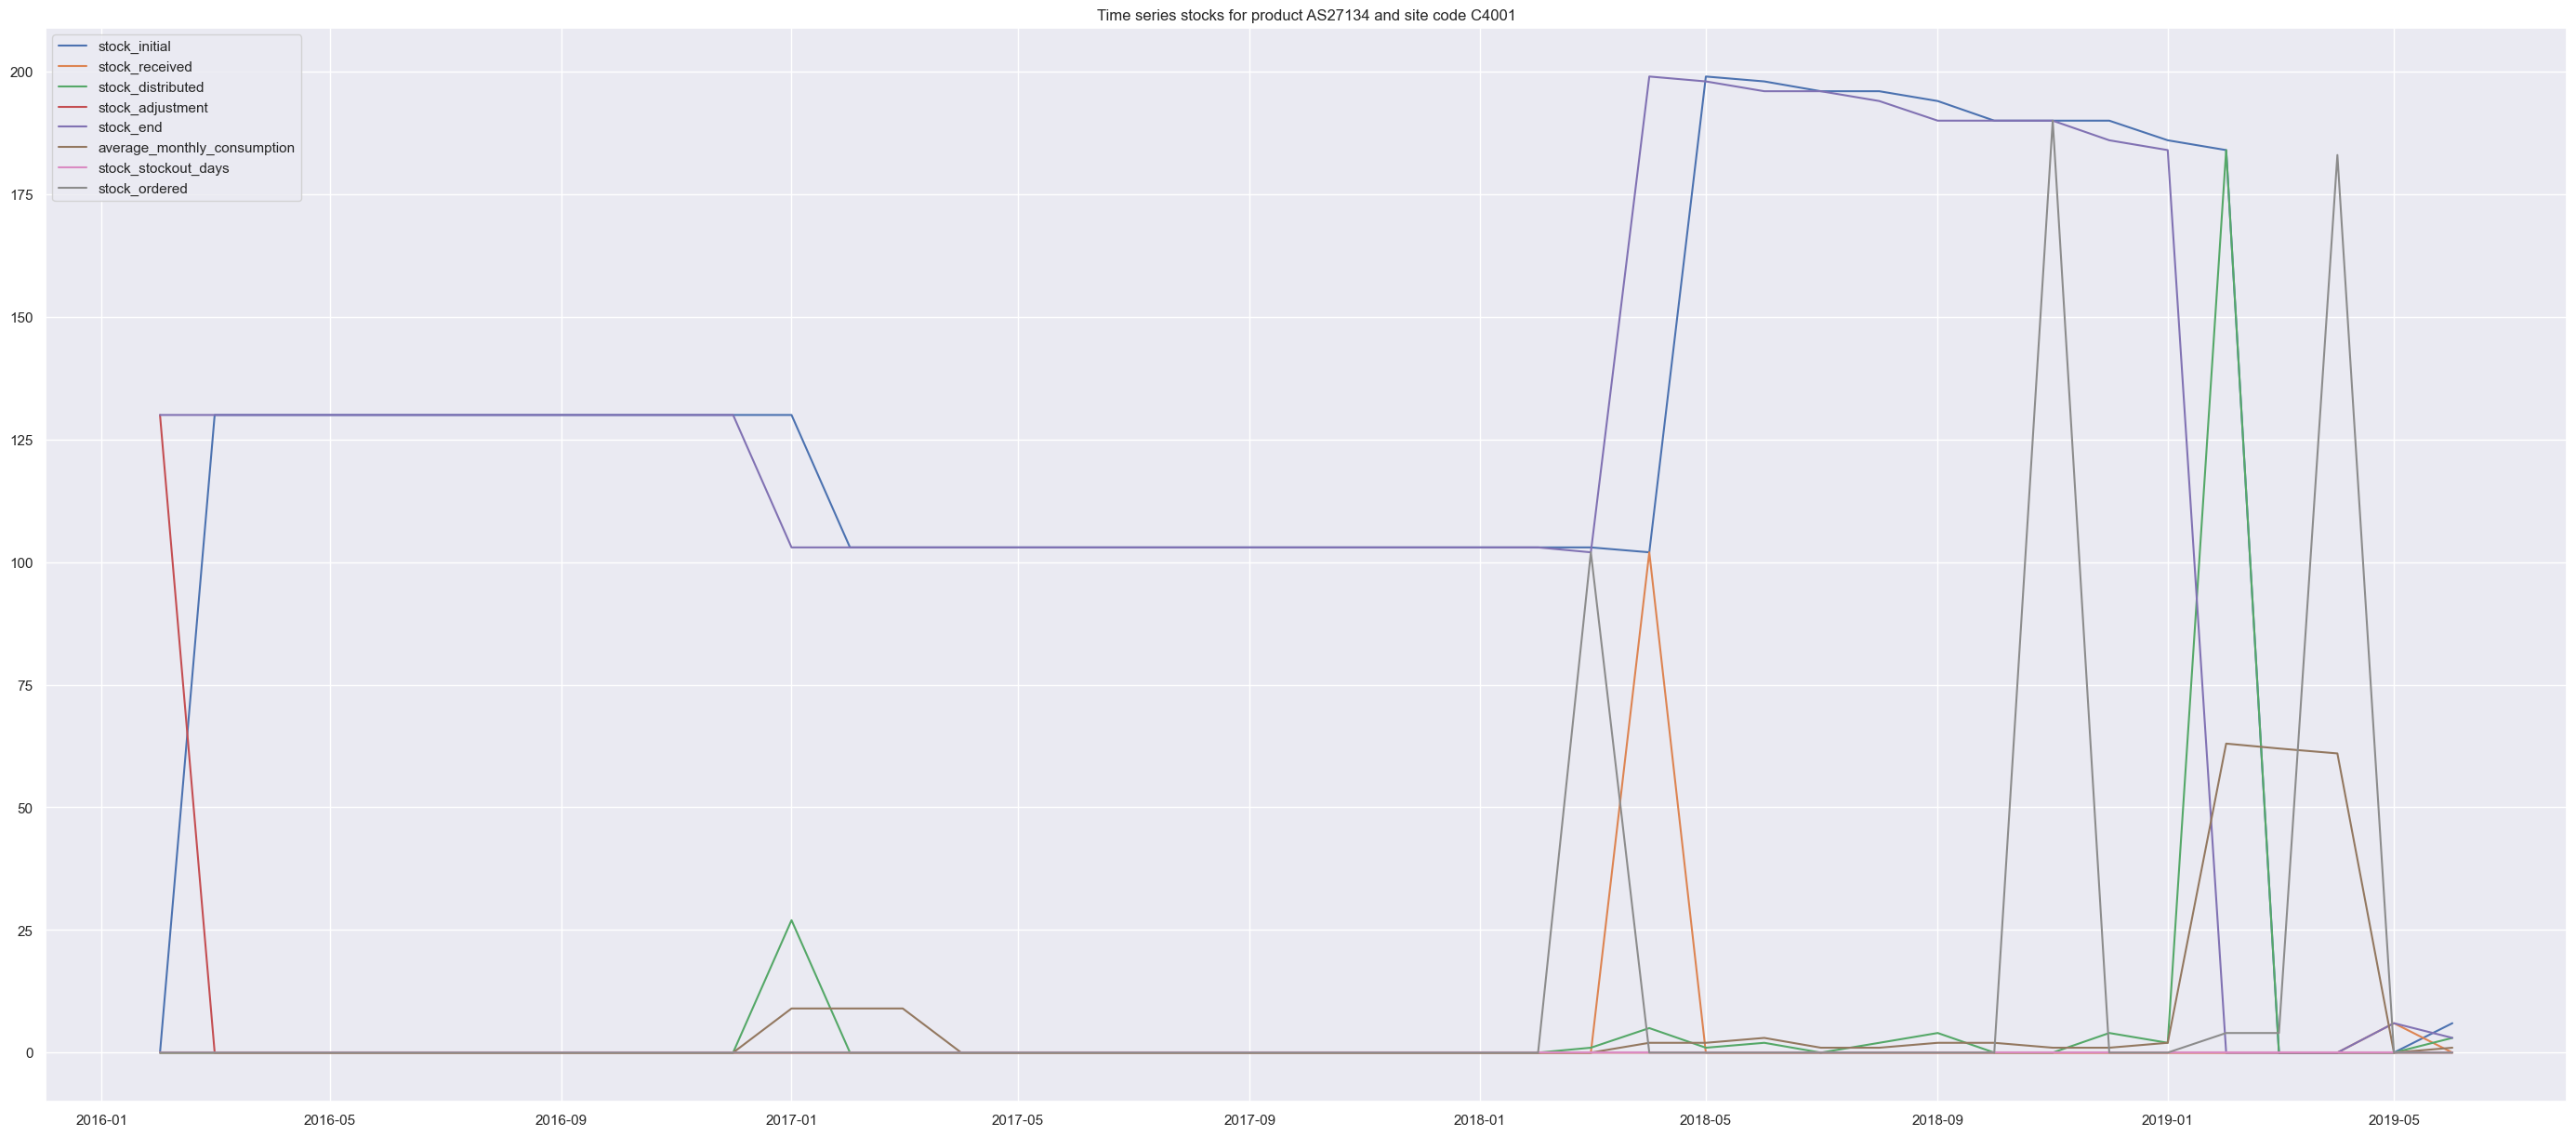

In [57]:
sns.set()
plt.rcParams["figure.figsize"] = (35,15)

data_product_site = train_format.loc[(train_format.loc[:,'site_code']=='C5004') & (train_format.loc[:,'product_code']=='AS27132') ,]#.interpolate()
data_product_site.index = data_product_site['date']
sorted_idx = data_product_site.index.sort_values()
data_product_site = data_product_site.loc[sorted_idx,]
data_product_site.fillna(method='ffill', inplace=True)
for col in data_product_site.columns[7:-2]:
    plt.plot(data_product_site.index, data_product_site[col], label=col)
plt.title('Time series stocks for product AS27134 and site code C4001')
plt.legend()

### Filling missing values

In [58]:
product_codes = np.unique(train_format.product_code)
site_codes = np.unique(train_format.site_code)
dates = np.unique(train_format.date)

k=0
for product in product_codes:
    if k>20:
        break
    for site in site_codes:
        missing_vals = preprocess.missing_stock_distributed_ts(train_format, product, site)
        #if (missing_vals>=len(dates)//2) & (missing_vals<=len(dates)/1.3):
        if missing_vals==30:
            print(f'product: {product} and site: {site} have {missing_vals} missing values')
            k+=1

product: AS17005 and site: C2002 have 30 missing values
product: AS27000 and site: C1080 have 30 missing values
product: AS27000 and site: C4056 have 30 missing values
product: AS27132 and site: C1080 have 30 missing values
product: AS27132 and site: C3012 have 30 missing values
product: AS27137 and site: C1067 have 30 missing values
product: AS27137 and site: C5020 have 30 missing values
product: AS27138 and site: C1099 have 30 missing values
product: AS27139 and site: C1011 have 30 missing values
product: AS27139 and site: C2002 have 30 missing values
product: AS42018 and site: C1080 have 30 missing values
product: AS42018 and site: C3011 have 30 missing values


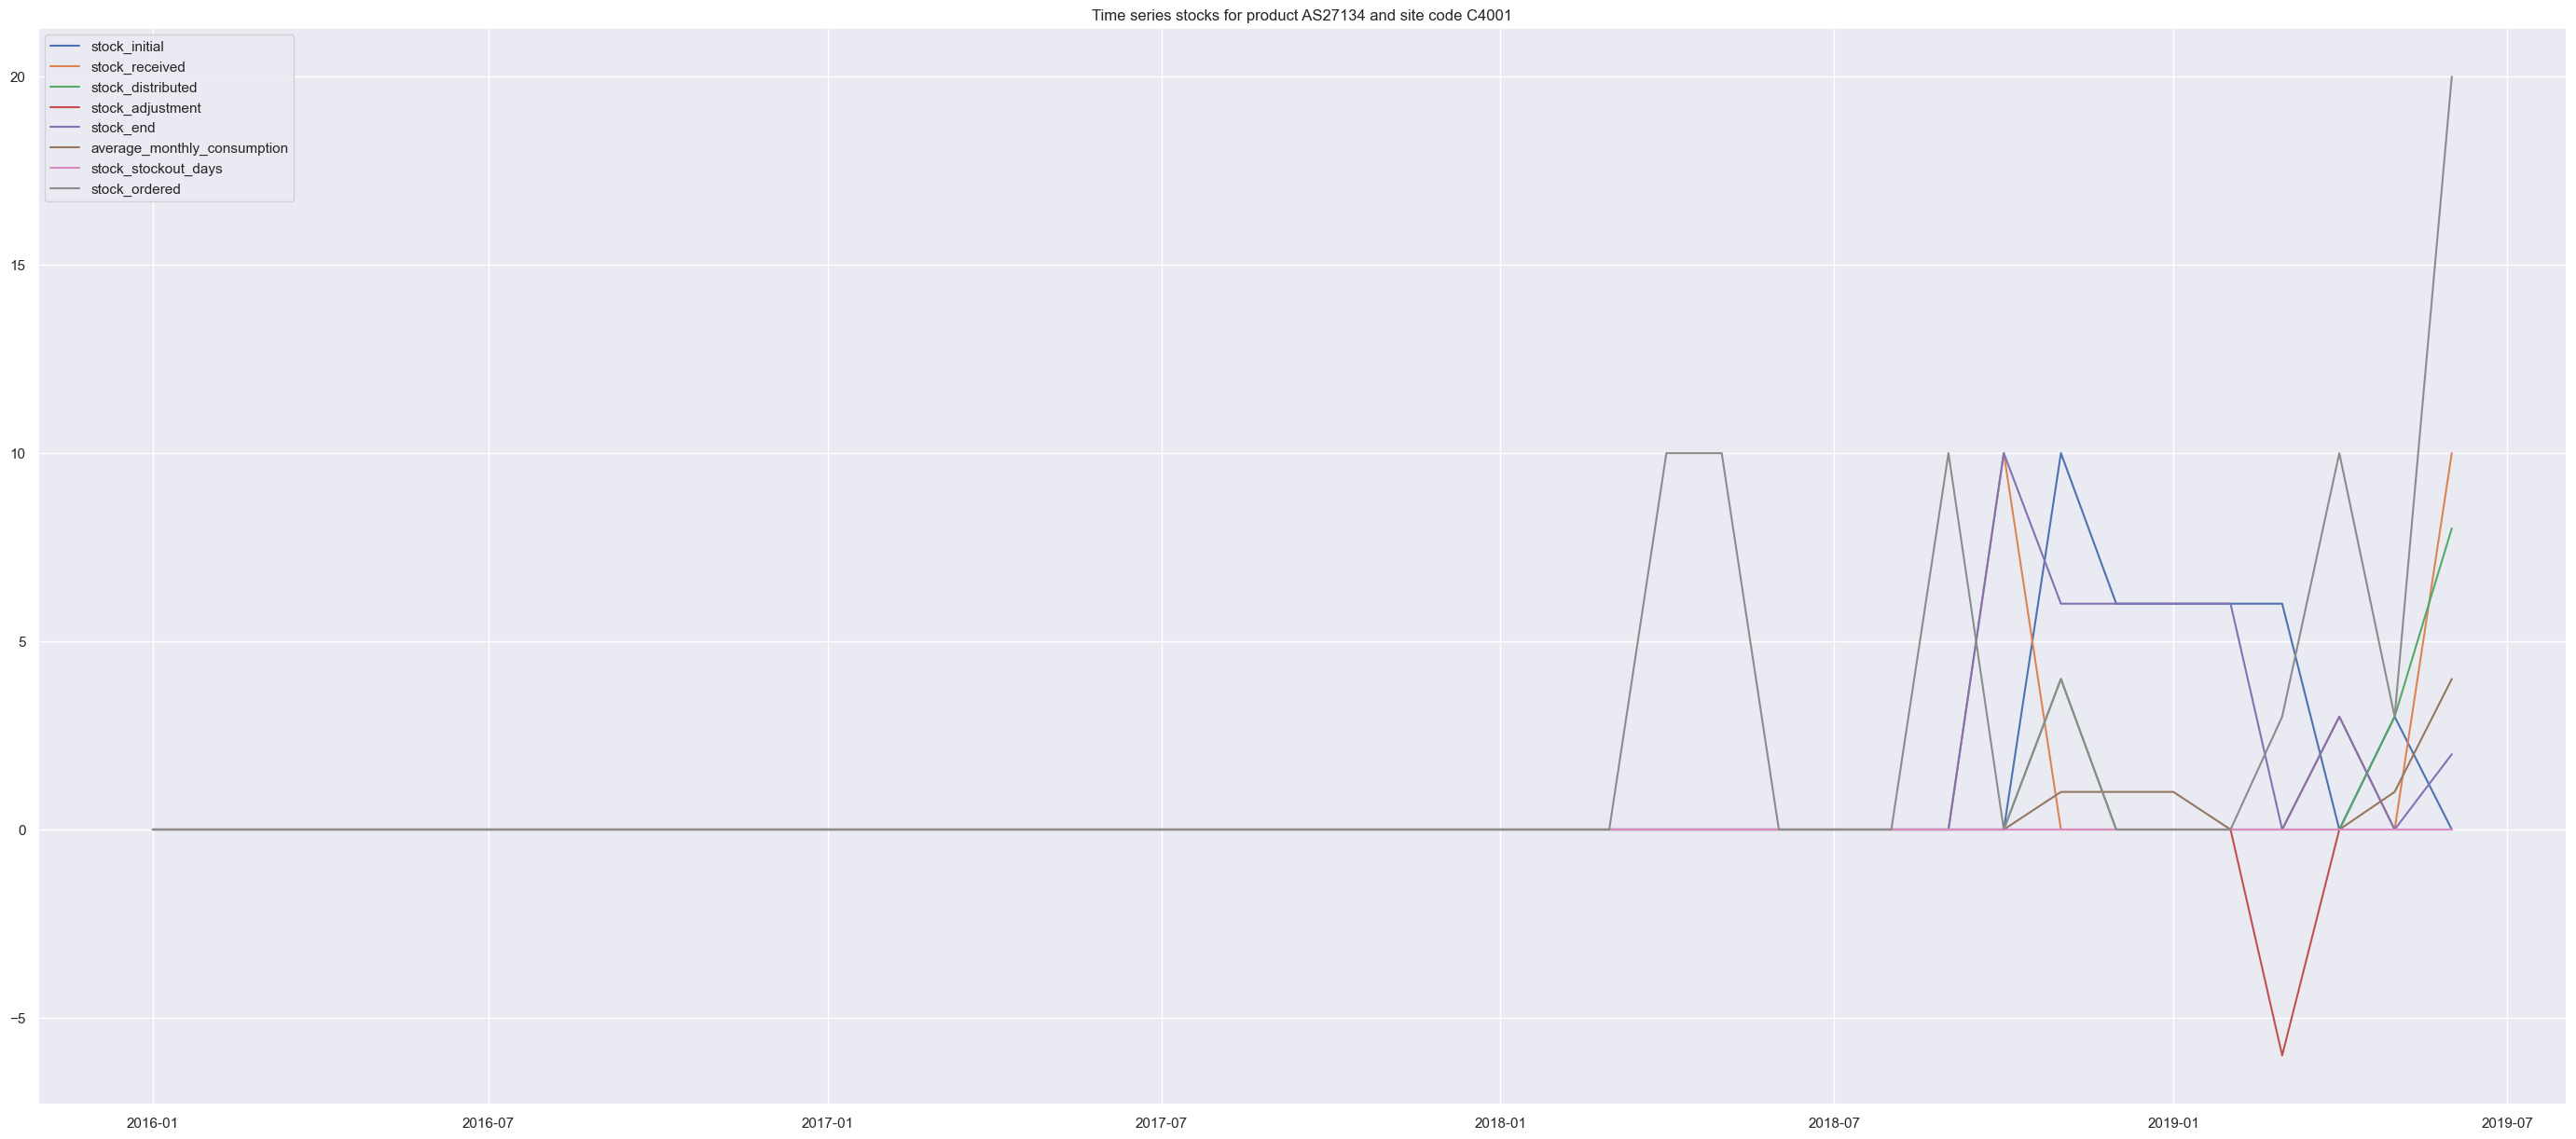

In [61]:
sns.set()
plt.rcParams["figure.figsize"] = (35,15)

data_product_site = train_format.loc[(train_format.loc[:,'site_code']=='C3012') & (train_format.loc[:,'product_code']=='AS27132') ,].fillna(0)
data_product_site.index = data_product_site['date']
sorted_idx = data_product_site.index.sort_values()
data_product_site = data_product_site.loc[sorted_idx,]

for col in data_product_site.columns[7:-2]:
    plt.plot(data_product_site.index, data_product_site[col], label=col)
plt.title('Time series stocks for product AS27134 and site code C4001')
plt.legend()

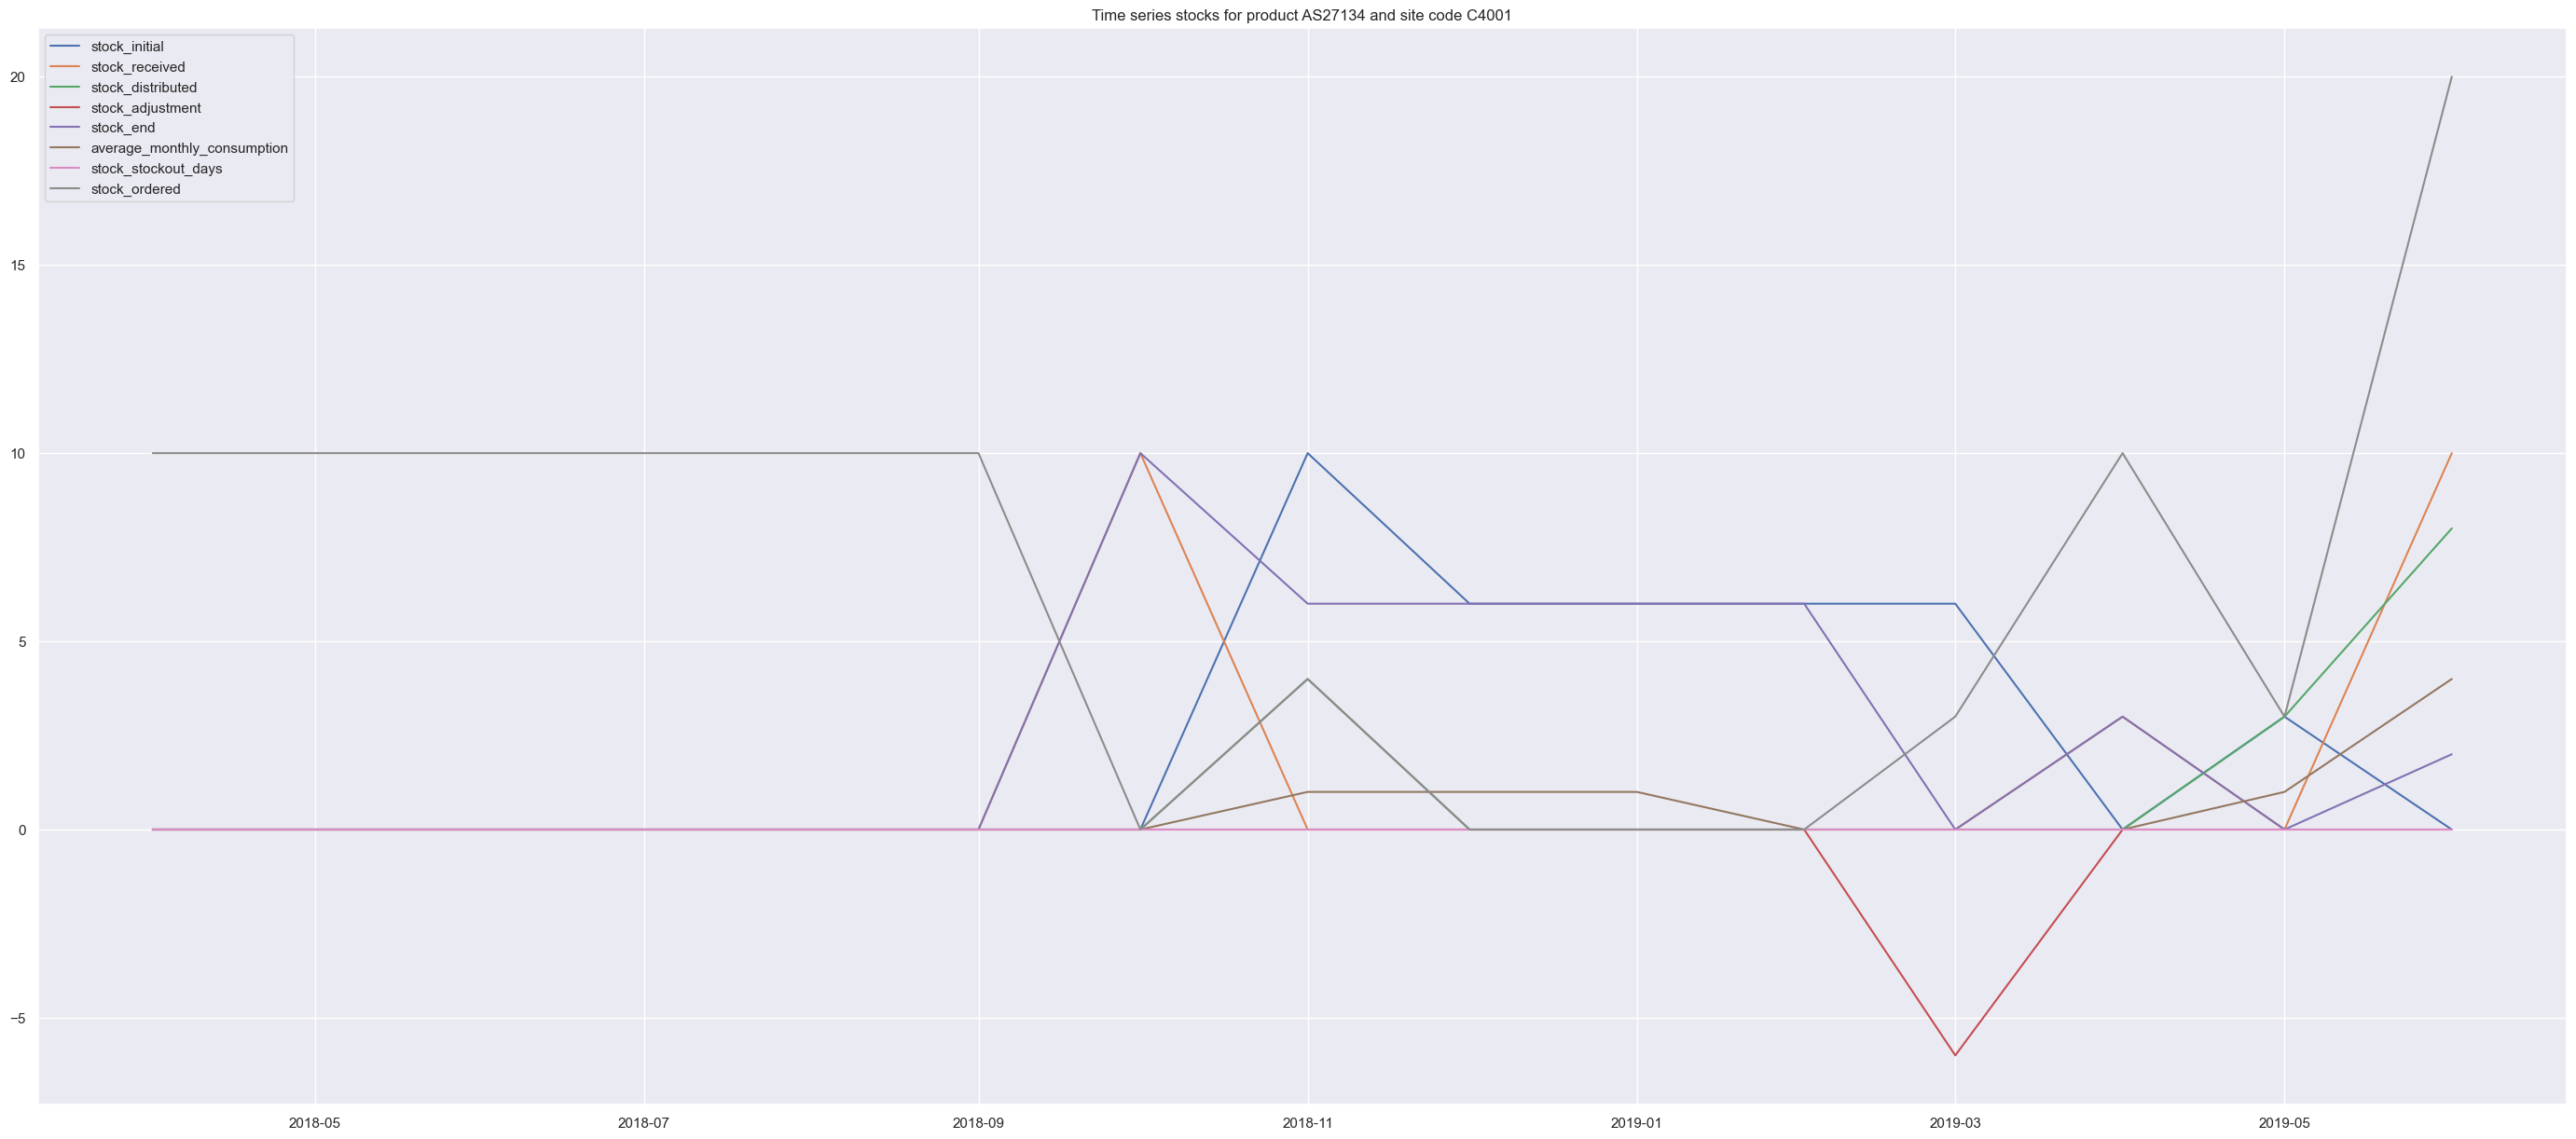

In [62]:
sns.set()
plt.rcParams["figure.figsize"] = (35,15)

data_product_site = train_format.loc[(train_format.loc[:,'site_code']=='C3012') & (train_format.loc[:,'product_code']=='AS27132') ,]#.interpolate()
data_product_site.index = data_product_site['date']
sorted_idx = data_product_site.index.sort_values()
data_product_site = data_product_site.loc[sorted_idx,]
data_product_site.fillna(method='ffill', inplace=True)
for col in data_product_site.columns[7:-2]:
    plt.plot(data_product_site.index, data_product_site[col], label=col)
plt.title('Time series stocks for product AS27134 and site code C4001')
plt.legend()

## Contraceptives Monthly

In [22]:
contraceptives_monthly = pd.read_csv(join(PATH_DATA, 'monthly_cases.csv'))
contraceptives_annual = pd.read_csv(join(PATH_DATA, 'annual_cases.csv'))

Unnamed: 0    district  year  implant_women_old  implant_women_new   
0             0  ABENGOUROU  2018             3298.0              965.0  \
1             1  ABENGOUROU  2017             2597.0              698.0   
2             2  ABENGOUROU  2016              865.0              408.0   
3             3   ABOBO EST  2018             4041.0             2234.0   
4             4   ABOBO EST  2017             1954.0             2491.0   
..          ...         ...   ...                ...                ...   
334         334  ZOUKOUGBEU  2017               12.0              161.0   
335         335  ZOUKOUGBEU  2016               21.0              253.0   
336         336    ZUENOULA  2018              176.0             1441.0   
337         337    ZUENOULA  2017              231.0              591.0   
338         338    ZUENOULA  2016              126.0              270.0   

     injection2_women_old  injection2_women_new  injection3_women_old   
0                  2997.0                 749.0                 10892  \
1                  2125.0                 588.0                  9939   
2                  2616.0                 786.0                  8407   
3                  2200.0                 583.0                 13504   
4                  1768.0                 214.0                 10745   
..                    ...                   ...                   ...   
334                 197.0                  54.0                   668   
335                 107.0                  74.0                   820   
336                 424.0                 145.0                  3368   
337                 502.0                 154.0                  3677   
338                 894.0                 271.0                  4236   

     injection3_women_new  pill_women_old  ...  iud_number_received   
0                    2609          1867.0  ...                673.0  \
1                    2480          1835.0  ...                544.0   
2                    2440          2675.0  ...                436.0   
3                    3940          2959.0  ...               1154.0   
4                    2389          3506.0  ...               2780.0   
..                    ...             ...  ...                  ...   
334                   433           124.0  ...                  NaN   
335                   484            31.0  ...                  NaN   
336                  1826           638.0  ...                 38.0   
337                  1611           585.0  ...                  7.0   
338                  1644          1982.0  ...                 49.0   

     implant_number_received  injection2_number_received   
0                     2435.0                      8799.0  \
1                     1760.0                      9920.0   
2                     1503.0                     11407.0   
3                     3309.0                      2241.0   
4                     4009.0                      5846.0   
..                       ...                         ...   
334                    203.0                       731.0   
335                    261.0                       902.0   
336                   1550.0                       774.0   
337                    813.0                      1342.0   
338                    288.0                      2020.0   

     injection3_number_received  pill_number_received  iud_stock_end   
0                       12890.0               35961.0            NaN  \
1                       12727.0               31260.0            NaN   
2                       12666.0               28256.0            NaN   
3                        9914.0                7426.0            NaN   
4                       11784.0               13191.0            NaN   
..                          ...                   ...            ...   
334                      1471.0                 713.0            NaN   
335                      1825.0                 935.0            NaN   
336  

In [21]:
contraceptives_monthly

district  month  year  implant_women_old  implant_women_new   
0    ABENGOUROU      1  2019              478.0               91.0  \
1    ABENGOUROU      2  2019              340.0               81.0   
2    ABENGOUROU      3  2019              367.0               59.0   
3    ABENGOUROU      4  2019              583.0               46.0   
4    ABENGOUROU      5  2019              407.0               60.0   
..          ...    ...   ...                ...                ...   
673    ZUENOULA      2  2019               43.0               87.0   
674    ZUENOULA      3  2019              125.0              224.0   
675    ZUENOULA      4  2019               62.0              106.0   
676    ZUENOULA      5  2019               25.0              111.0   
677    ZUENOULA      6  2019                9.0               95.0   

     injection2_women_old  injection2_women_new  injection3_women_old   
0                   103.0                  17.0                  1278  \
1                   126.0                  10.0                  1237   
2                    14.0                   7.0                  1300   
3                     6.0                   1.0                  1296   
4                    46.0                  20.0                  1356   
..                    ...                   ...                   ...   
673                  11.0                   2.0                   383   
674                   5.0                   4.0                   426   
675                   9.0                   NaN                   341   
676                  14.0                   2.0                   364   
677                  20.0                   7.0                   228   

     injection3_women_new  pill_women_old  ...  iud_number_received   
0                     296           195.0  ...                  NaN  \
1                     253           187.0  ...                 20.0   
2                     224           147.0  ...                 50.0   
3                     336           200.0  ...                 45.0   
4                     281           156.0  ...                 14.0   
..                    ...             ...  ...                  ...   
673                   152            42.0  ...                  3.0   
674                   255            58.0  ...                  3.0   
675                   127           145.0  ...                  3.0   
676                   116            92.0  ...                  1.0   
677                   108            47.0  ...                  NaN   

     implant_number_received  injection2_number_received   
0                      319.0                        33.0  \
1                      255.0                        17.0   
2                      214.0                        50.0   
3                      217.0                        55.0   
4                      321.0                       256.0   
..                       ...                         ...   
673                    176.0                         4.0   
674                    223.0                         2.0   
675                    261.0                        17.0   
676                    154.0                        18.0   
677                    128.0                        32.0   

     injection3_number_received  pill_number_received  iud_stock_end   
0                        1244.0                2846.0            NaN  \
1                        1174.0                2608.0            NaN   
2                        1050.0                2148.0            NaN   
3                         824.0                1787.0            NaN   
4                        1032.0                1635.0            NaN   
..                          ...                   ...            ...   
673                       449.0                 509.0            NaN   
674                       553.0                 523.0            NaN   
675                       340.0                 520.0            Na